todo:
* cropping

# Explore input data

In [1]:
import os
imgPath = os.path.join('ignore','data', 'train', 'BRATS_001.nii.gz')

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import nibabel as nib
imgNii = nib.load(imgPath)
type(imgNii)

nibabel.nifti1.Nifti1Image

https://nifti.nimh.nih.gov/nifti-1/

In [3]:
imgNP = imgNii.get_data()
type(imgNP)

numpy.ndarray

In [4]:
print(f"It is of shape {imgNP.shape}, containing data of type {imgNP.dtype}.")

It is of shape (240, 240, 155, 4), containing data of type float32.


#### Why 4 components?
* 4 different scan modalities
* 155 slices
* 240x240 images

### Plot the 4 channels, at slice 60 and 120.

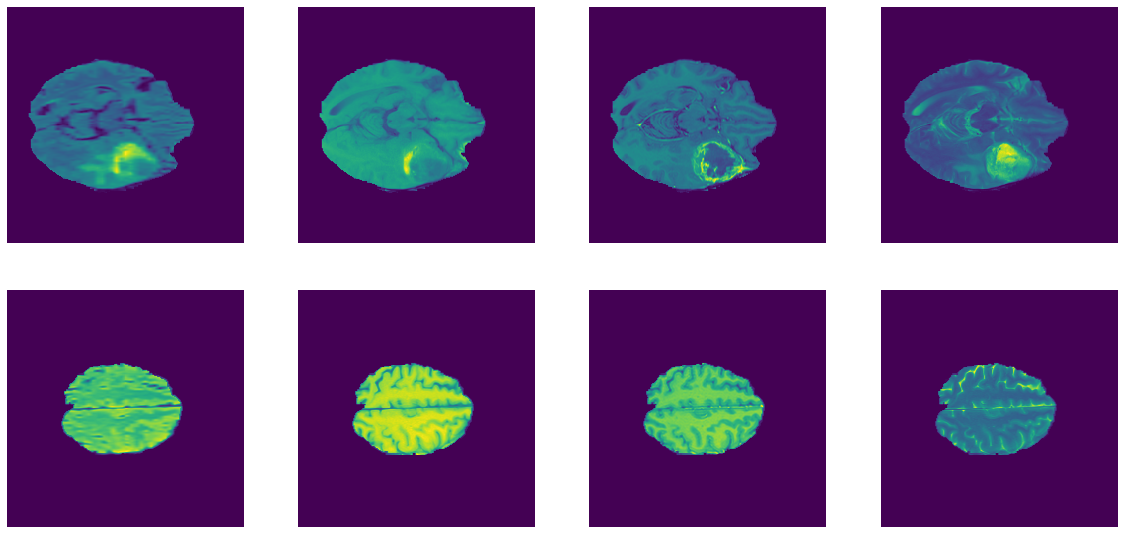

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
slices = [60,120]
num_channels = imgNP.shape[-1]
k = 1
for slice in slices:
    for j in range(num_channels):
        plt.subplot(num_channels,num_channels,k)
        plt.axis('off')
        plt.imshow(imgNP[:,:,slice,j])
        k+=1
plt.show()

#### Cropping might not be a bad idea.

### Plot channel 2, at various slices.

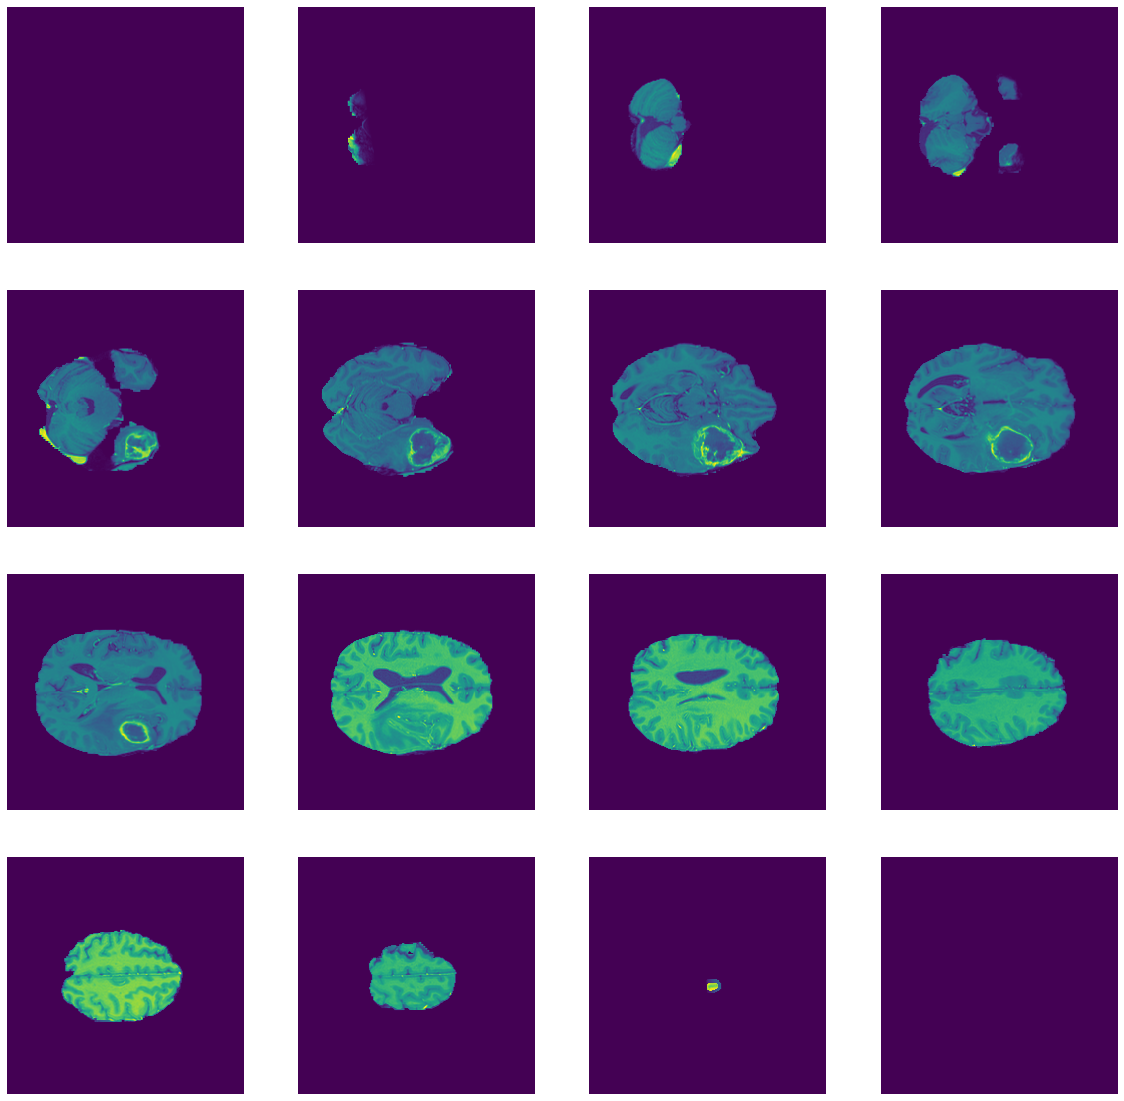

In [12]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(imgNP[:,:,i*10,2])
plt.show()

#### Mid-range slices seem to be giving the best contribution.

### Bonus: we could also treat x as slices for a 240x155 image.

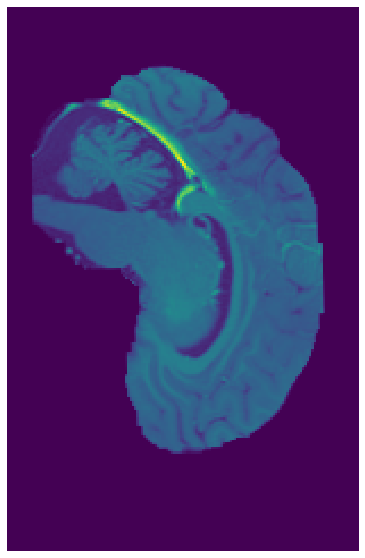

In [22]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(imgNP[120,:,:,2])
plt.show()

# Explore Output data

In [15]:
outPath = os.path.join('ignore','data', 'labels', 'BRATS_001.nii.gz')
outNii = nib.load(outPath)
outNP = outNii.get_data()
print(f"It is of shape {outNP.shape}, containing data of type {outNP.dtype}.")

It is of shape (240, 240, 155), containing data of type uint8.


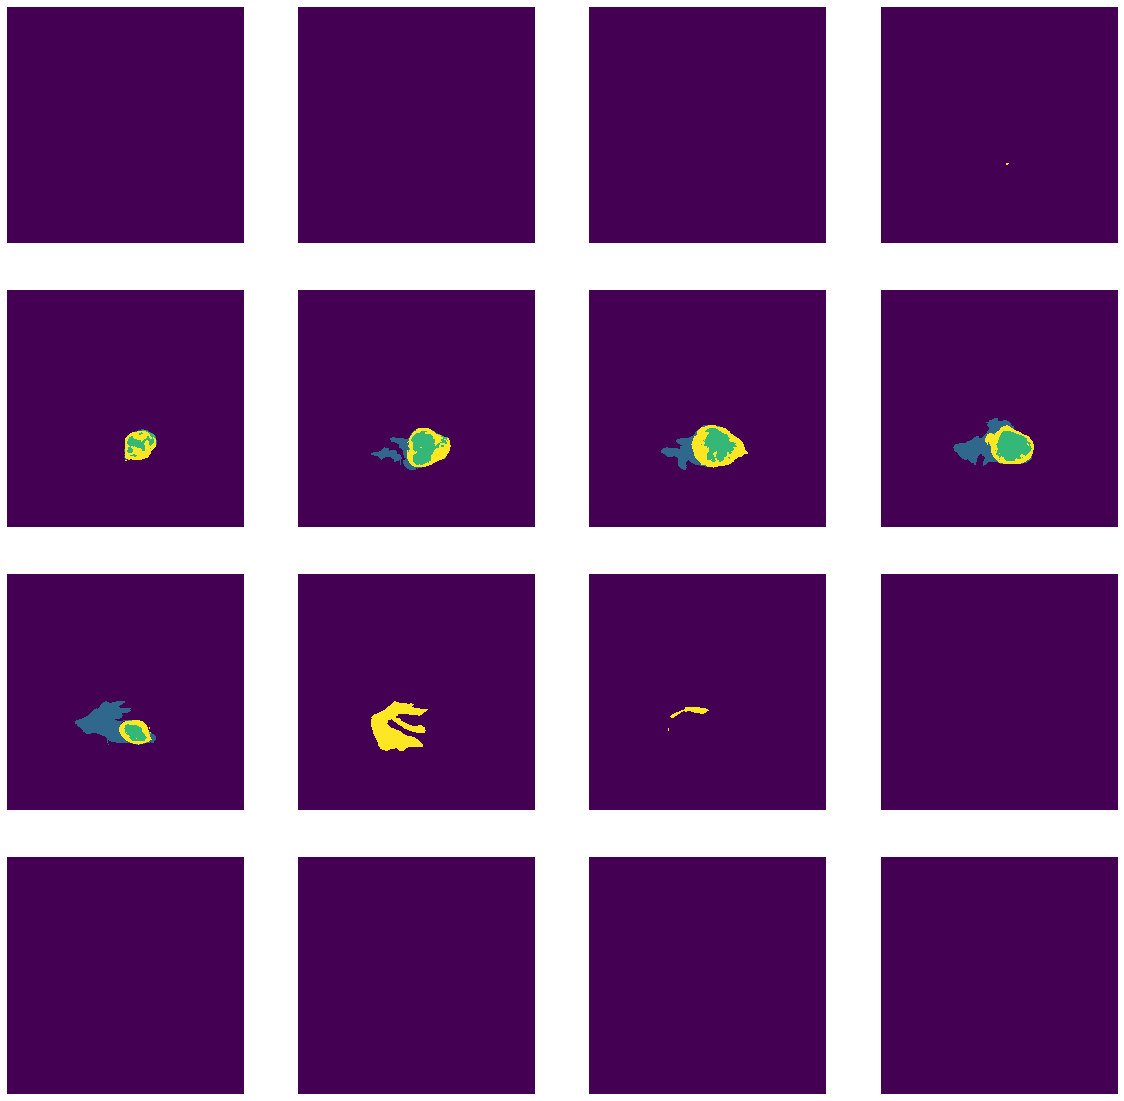

In [16]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(outNP[:,:,i*10])
plt.show()

### Two observations:
* dtype is `uint8` but multiple colors appear.
* Perhaps throwing away top and bottom slices is not a terrible idea.

In [17]:
print(outNP.min(),outNP.max())

0 3


#### From documentation we know:
* 0: background
* 1: edema
* 2: non-enhancing tumor
* 3: enhancing tumor

Let's see what proportion is what.

In [18]:
# sanity check:
assert sum([len(outNP[outNP==i]) for i in range(4)]) == (240*240*155)
N = int(240*240*155)

for i in range(4):
    l = float(len(outNP[outNP==i]))/N
    print(l)

0.9874861111111111
0.005941980286738351
0.0030453629032258065
0.0035265456989247313


We will group together 1,2,3: background vs not background.

# Cropping

### get from tinker notebook (missing locally right now)

# Downsample

### input data

In [21]:
# Remove a few top and bottom slices.
LOW = 46
HIGH = 110
npImg = imgNP[:,:,LOW:HIGH,:]
npImg.shape

(240, 240, 64, 4)

In [22]:
# Resize
import skimage.transform
inResized = skimage.transform.resize(npImg, (32,32,64,4))

In [23]:
print(inResized.shape)
print(inResized.dtype)

(32, 32, 64, 4)
float32


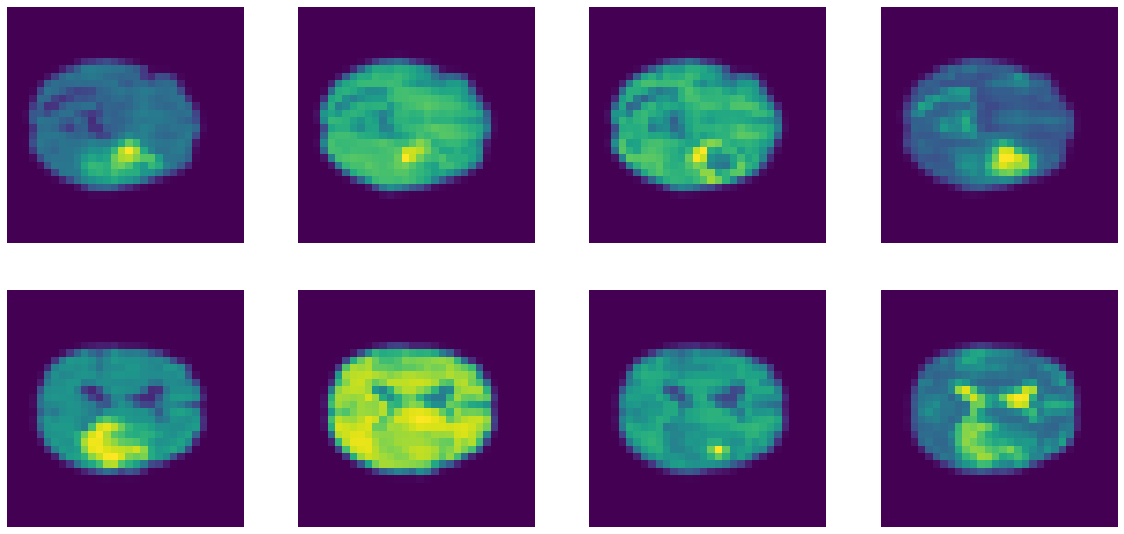

In [24]:
# Making sure the structure was maintained
plt.figure(figsize=(20,20))
slices = [20,40]
num_channels = inResized.shape[-1]
k = 1
for slice in slices:
    for j in range(num_channels):
        plt.subplot(num_channels,num_channels,k)
        plt.axis('off')
        plt.imshow(inResized[:,:,slice,j])
        k+=1
plt.show()

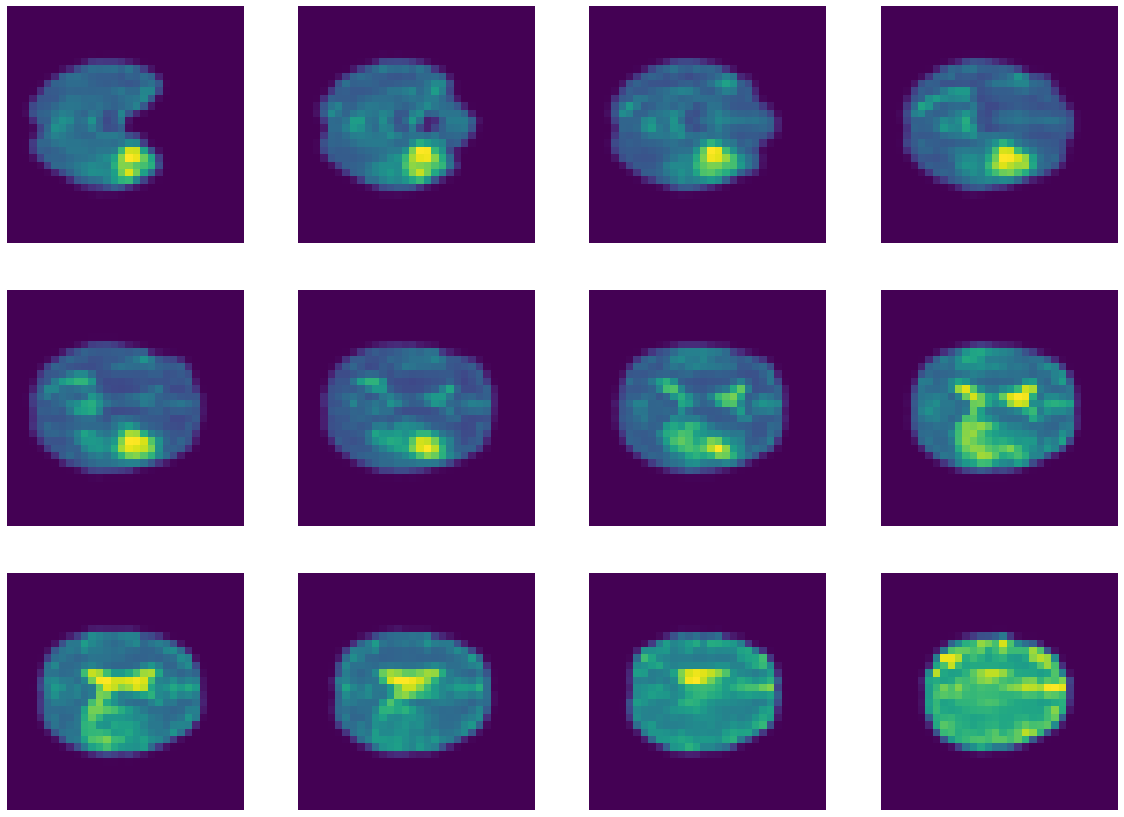

In [25]:
# A glance at downsampling across slices
plt.figure(figsize=(20,20))
for i in range(1,13):
    plt.subplot(4,4,i)
    plt.axis('off')
    plt.imshow(inResized[:,:,i*5,3])
plt.show()

### output data

In [26]:
npImg = outNP[:,:,LOW:HIGH]
outResized = skimage.transform.resize(npImg,(32,32,64),preserve_range=True,anti_aliasing=False,order=0)

In [30]:
import numpy as np
print(outResized.dtype, outResized.min(), outResized.max())
outResized = outResized.astype('uint8')
print(outResized.dtype, outResized.min(), outResized.max())
clipped = np.clip(outResized,0,1)
print(clipped.dtype, clipped.min(), clipped.max())

uint8 0 3
uint8 0 3
uint8 0 1


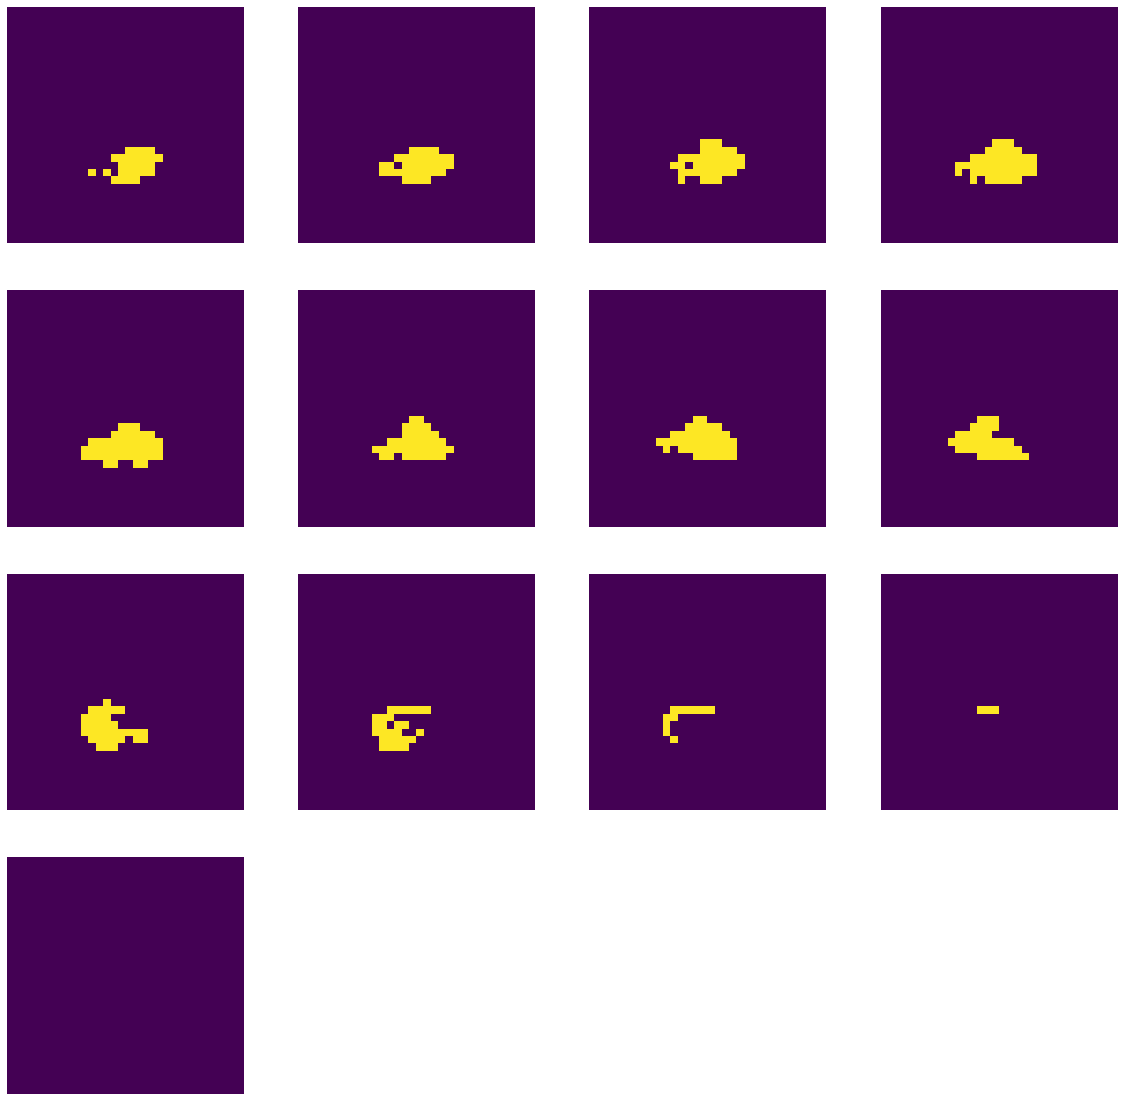

In [31]:
# plot of Resized output
plt.figure(figsize=(20,20))
for i in range(13):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(clipped[:,:,i*5])
plt.show()

# Run `convert_to_np.npy`
Check that conversion went fine.

In [ ]:
imgPath = os.path.join('ignore','data', 'num32train', 'BRATS_001.nii.gz.npy')
img = np.load(imgPath)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
slices = [20,40]
num_channels = img.shape[0]
k = 1
for slice in slices:
    for j in range(num_channels):
        plt.subplot(num_channels,num_channels,k)
        plt.axis('off')
        plt.imshow(img[j,:,:,slice])
        k+=1
plt.show()

In [ ]:
imgPath = os.path.join('ignore','data', 'num32labels', 'BRATS_001.nii.gz.npy')
img = np.load(imgPath)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img[:,:,30])
plt.show()